# Goal: use LUR + Kriging to do interpolation
- access OSM via python: https://pygis.io/docs/d_access_osm.html

# download OSM data

In [6]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as plt

In [10]:
place_name = "Los Angeles County, CA, USA"
area = ox.geocode_to_gdf(place_name)
area

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-118.95172 33.99286, -118.9456...",-118.951722,32.75004,-117.64627,34.823312,291351125,relation,396479,34.315507,-118.209681,boundary,administrative,12,0.641225,county,Los Angeles County,"Los Angeles County, California, United States"


<Axes: >

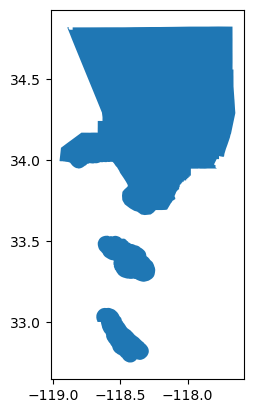

In [14]:
area.plot()

In [25]:
# Landuse data
landuse_tags = {"landuse": True}

ox.settings.requests_kwargs = {"verify": False}

landuse = ox.features_from_place(place_name, landuse_tags)
landuse = landuse[landuse.geometry.type.isin(["Polygon", "MultiPolygon"])]

C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\A

In [44]:
park_tags = {"leisure": ["park", "garden", "recreation_ground"]}
parks = ox.features_from_place(place_name, park_tags)

C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\A

In [46]:
# street network
G = ox.graph_from_place(place_name, network_type = "drive")
edges = ox.graph_to_gdfs(G, nodes = False, edges = True)
edges.to_file("../Data/Output/OSM/edgewood_drive_roads.shp")

C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\A

In [74]:
# download them as shp
keep = ["landuse"]
landuse = landuse[ keep + ["geometry"] ]
landuse.to_file("../Data/Output/OSM/edgewood_landuse.shp", driver = "ESRI Shapefile")

In [72]:
parks.to_file("../Data/Output/OSM/parks.shp", driver = "ESRI Shapefile")

C:\Users\jduan\AppData\Local\Temp\ipykernel_6656\2441474611.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  parks.to_file("../Data/Output/OSM/parks.shp", driver = "ESRI Shapefile")
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'gnis:feature_id' to 'gnis_featu'
  ogr_write(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'garden:type' to 'garden_typ'
  ogr_write(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'opening_hours' to 'opening_ho'
  ogr_write(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'garden:style' to 'garden_sty'
  ogr_write(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723:

FeatureError: Could not add feature to layer at index 208: Attempt to write non-point (POLYGON) geometry to point shapefile.

In [93]:
# landuse.plot()
landuse['landuse'].value_counts()[:20]

landuse
residential          13754
grass                 8391
retail                2613
commercial            2124
industrial            1424
brownfield             797
religious              690
construction           592
meadow                 326
forest                 272
farmland               238
recreation_ground      227
plant_nursery          212
railway                 97
cemetery                89
farmyard                87
military                85
village_green           82
basin                   81
vineyard                46
Name: count, dtype: int64

geometry  ele  \
element id                                                                   
node    358779407                         POINT (-118.48536 34.17639)  214   
        358779974                         POINT (-118.18955 34.10409)  198   
        358781336                         POINT (-118.28349 33.70989)    2   
        358781520                          POINT (-118.1884 33.87585)   16   
        358782668                         POINT (-118.25924 34.22528)  439   
...                                                               ...  ...   
way     1372727248  POLYGON ((-118.39737 33.94457, -118.3974 33.94...  NaN   
        1372727252  POLYGON ((-118.40169 33.94406, -118.40158 33.9...  NaN   
        1372727256  POLYGON ((-118.40258 33.94317, -118.40258 33.9...  NaN   
        1372727257  POLYGON ((-118.39751 33.94363, -118.39747 33.9...  NaN   
        1373847800  POLYGON ((-118.53958 34.2529, -118.53936 34.25...  NaN   

                   gnis:feature_id leisure                           name  \
element id                                                                  
node    358779407           238367    park  Sepulveda Dam Recreation Area   
        358779974           238773    park               Arroyo Seco Park   
        358781336           239955    park            Cabrillo Beach Park   
        358781520           240112    park                    Camp Suanga   
        358782668           241091    park          Crescenta Valley Park   
...                            ...     ...                            ...   
way     1372727248             NaN  garden                            NaN   
        1372727252             NaN  garden                            NaN   
        1372727256             NaN  garden                            NaN   
        1372727257             NaN  garden                            NaN   
        1373847800             NaN  garden                            NaN   

                     wikidata fixme amenity check_date website  ... type  \
element id                                                      ...        
node    358779407   Q49559687   NaN     NaN        NaN     NaN  ...  NaN   
        358779974   Q49472984   NaN     NaN        NaN     NaN  ...  NaN   
        358781336         NaN   NaN     NaN        NaN     NaN  ...  NaN   
        358781520   Q49476709   NaN     NaN        NaN     NaN  ...  NaN   
        358782668   Q49480955   NaN     NaN        NaN     NaN  ...  NaN   
...                       ...   ...     ...        ...     ...  ...  ...   
way     1372727248        NaN   NaN     NaN        NaN     NaN  ...  NaN   
        1372727252        NaN   NaN     NaN        NaN     NaN  ...  NaN   
        1372727256        NaN   NaN     NaN        NaN     NaN  ...  NaN   
        1372727257        NaN   NaN     NaN        NaN     NaN  ...  NaN   
        1373847800        NaN   NaN     NaN        NaN     NaN  ...  NaN   

                   highway genus:en construction source:url meadow  FID  \
element id                                                                
node    358779407      NaN      NaN          NaN        NaN    NaN  NaN   
        358779974      NaN      NaN          NaN        NaN    NaN  NaN   
        358781336      NaN      NaN          NaN        NaN    NaN  NaN   
        358781520      NaN      NaN          NaN        NaN    NaN  NaN   
        358782668      NaN      NaN          NaN        NaN    NaN  NaN   
...                    ...      ...          ...        ...    ...  ...   
way     1372727248     NaN      NaN          NaN        NaN    NaN  NaN   
        1372727252     NaN      NaN          NaN        NaN    NaN  NaN   
        1372727256     NaN      NaN          NaN        NaN    NaN  NaN   
        1372727257     NaN      NaN          NaN        NaN    NaN  NaN   
        1373847800     NaN      NaN          NaN        NaN    NaN  NaN   

                   source:start_date:url source:start_date:url2 proposed:name  

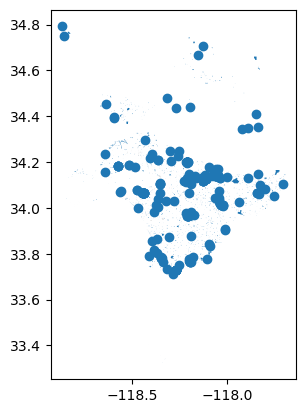

In [52]:
parks.plot()
parks

osmid  \
u           v          key                                                    
653656      1718677597 0                                          159763316   
            123189012  0    [1094670073, 1094670074, 1055876622, 383059215]   
            122697159  0     [1050285331, 1050285330, 399239123, 399239118]   
            1718756337 0                             [399258376, 399258374]   
653681      26427612   0                  [49287146, 1215909510, 149003055]   
...                                                                     ...   
12461746836 3716058615 1                                         1347177140   
            916287289  0                    [97819225, 97819226, 367716143]   
12526726244 3701934377 0                                          366209006   
                       1                                          366209006   
            3701934357 0                                          366209006   

                                 highway      lanes maxspeed  \
u           v          key                                     
653656      1718677597 0       secondary          4   40 mph   
            123189012  0         primary  [6, 5, 4]      NaN   
            122697159  0         primary  [6, 5, 4]      NaN   
            1718756337 0        tertiary     [5, 4]      NaN   
653681      26427612   0        motorway     [6, 5]   65 mph   
...                                  ...        ...      ...   
12461746836 3716058615 1    unclassified        NaN      NaN   
            916287289  0    unclassified        NaN      NaN   
12526726244 3701934377 0     residential        NaN      NaN   
                       1     residential        NaN      NaN   
            3701934357 0     residential        NaN      NaN   

                                                 name  oneway reversed  \
u           v          key                                               
653656      1718677597 0         West Florence Avenue   False    False   
            123189012  0    West Manchester Boulevard   False    False   
            122697159  0       West Manchester Avenue   False     True   
            1718756337 0           Aviation Boulevard   False    False   
653681      26427612   0            San Diego Freeway    True    False   
...                                               ...     ...      ...   
12461746836 3716058615 1               Hard Luck Road   False     True   
            916287289  0              Los Alamos Road   False     True   
12526726244 3701934377 0                          NaN   False    False   
                       1                          NaN   False     True   
            3701934357 0                          NaN   False     True   

                                 length  \
u           v          key                
653656      1718677597 0     253.851490   
            123189012  0     159.911386   
            122697159  0     161.242924   
            1718756337 0     402.734149   
653681      26427612   0     252.270522   
...                                 ...   
12461746836 3716058615 1      84.711791   
            916287289  0    4745.746888   
12526726244 3701934377 0      56.220999   
                       1     236.668059   
            3701934357 0     138.499626   

                                                                     geometry  \
u           v          key                                                      
653656      1718677597 0    LINESTRING (-118.37705 33.9599, -118.37705 33....   
            123189012  0    LINESTRING (-118.37705 33.9599, -118.37693 33....   
            122697159  0    LINESTRING (-118.37705 33.9599, -118.37719 33....   
            1718756337 0    LINESTRING (-118.37705 33.9599, -118.37705 33....   
653681      26427612   0    LINESTRING (-118.40031 33.9894, -118.40048 33....   
...                                                                       ...   
12461746836 3716058615 1    LINESTRING

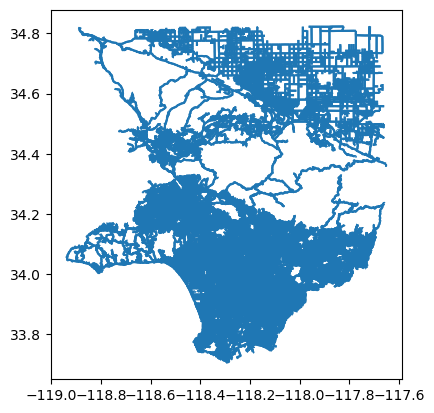

In [57]:
edges.plot()
edges

In [81]:
edges['highway'].value_counts()

highway
residential                       315904
tertiary                           56512
secondary                          40282
primary                            29996
unclassified                        6887
motorway_link                       3917
motorway                            2662
primary_link                        1681
secondary_link                       902
trunk                                723
tertiary_link                        446
[tertiary, residential]              312
living_street                        179
[residential, unclassified]          165
busway                               133
trunk_link                            67
[tertiary, secondary]                 30
[tertiary, unclassified]              24
[residential, secondary]              10
[primary, secondary]                   8
escape                                 5
[tertiary, motorway_link]              5
[secondary, motorway_link]             4
[motorway, motorway_link]              4
[primary

# feature selection

In [1]:
import statsmodels.api as sm

In [8]:
LU = gpd.read_file('../Data/Output/OSM/edgewood_landuse.shp')
PARK = gpd.read_file('../Data/Output/OSM/parks.shp')
STREET = gpd.read_file('../Data/Output/OSM/edgewood_drive_roads.shp')
PA = gpd.read_file('../Data/Output/PurpleAir_after_Calibration.shp')

In [9]:
target_crs = "EPSG:3310"
LU = LU.to_crs(target_crs)
PARK = PARK.to_crs(target_crs)
STREET = STREET.to_crs(target_crs)
PA = PA.to_crs(target_crs)

In [10]:
# closeness to different types of street
from geopandas.tools import sjoin_nearest

street_types = ["residential", "tertiary", "secondary", "primary"]
street_dict = {stype: STREET[STREET['highway'] == stype].copy() for stype in street_types}
for stype, gdf_street in street_dict.items():
    nearest = sjoin_nearest(PA, gdf_street[['geometry']], how = "left", distance_col = f"dist_to_{stype}")
    PA[f"dist_to_{stype}"] = nearest[f"dist_to_{stype}"].reset_index(drop=True)

In [ ]:
from tqdm import tqdm

# landuse percentage
miles_to_meters = lambda mi: mi * 1609.34
buffer_distances = {
    "05mi": miles_to_meters(0.5),
    "1mi": miles_to_meters(1),
    "3mi": miles_to_meters(3),
    "5mi": miles_to_meters(5),
}
selected_types = [
    'residential', 'grass', 'retail', 'commercial', 'industrial', 'brownfield',
    'religious', 'construction', 'meadow', 'forest', 'farmland', 'recreation_ground',
    'plant_nursery', 'railway', 'cemetery', 'farmyard', 'military', 'village_green'
]

landuse_types = LU[LU['landuse'].isin(selected_types)].copy()

for label, dist in tqdm(buffer_distances.items()): # 4 sizes of buffer
    PA[f'buffer_{label}'] = PA.geometry.buffer(dist)
    for lu_type in landuse_types:
        colname = f'pct_{lu_type}_{label}'
        PA[colname] = 0.0

    for idx, row in tqdm(PA.iterrows(), total=len(PA), desc=f"Buffer {label}"):
        buffer_geom = row[f'buffer_{label}']
        
        LU_clip = LU[LU.geometry.intersects(buffer_geom)]
        LU_clip = LU_clip.copy()
        LU_clip['intersect_geom'] = LU_clip.geometry.intersection(buffer_geom)
        LU_clip['intersect_area'] = LU_clip['intersect_geom'].area
        total_area = buffer_geom.area
        if total_area == 0:
            continue
        for lu_type in landuse_types:
            area = LU_clip.loc[LU_clip['landuse'] == lu_type, 'intersect_area'].sum()
            PA.at[idx, f'pct_{lu_type}_{label}'] = area / total_area * 100

Buffer 05mi:   5%|▌         | 27761/552552 [02:45<44:57, 194.52it/s]